## Import Libraries

In [151]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [152]:
df = pd.read_csv("/content/ehsan_cleaned.csv")

In [153]:
df.shape

(1485, 12)

In [154]:
df.tail(2)

,Unnamed: 0,Case Number,Project Names,Amount,Date,Beneficiaries,Beneficiary type,Number of donations,Partner,Location,Details URL,Hijri_Month
1483,1483,P47317,دعم الأسر المنتجة,200000,2024-01-25,10,المواطنون,18792,جمعية التنمية الأهلية بالشقيق,الشقيق,https://ehsan.sa/projects/0/46318?amount=null,رجب
1484,1484,P47306,دعم الأسر المحتاجة,250000,2024-01-25,250,المواطنون,16538,جمعية البر والخدمات الاجتماعية بمركز ترج,بيشة,https://ehsan.sa/projects/0/46307?amount=null,رجب


In [155]:
df['Location'].value_counts()

,count
Location,
الرياض,201
مكة المكرمة,159
جدة,57
المدينة المنورة,52
جازان,39
...,...
بني سار,1
الأضارع,1
صفوى,1


In [156]:
# Create a mapping of locations to their encoded values based on frequency
location_counts = df['Location'].value_counts()
location_mapping = {location: i for i, location in enumerate(location_counts.index)}

# Create a custom encoding function using the mapping
def encode_location(location):
    return location_mapping.get(location)

# Apply the custom encoding function to the 'Location' column
df['Location_encoded'] = df['Location'].apply(encode_location)

# Now, df['Location_encoded'] contains encoded values
# that reflect the frequency of locations in the original data

In [157]:
df['Partner'].value_counts()

,count
Partner,
جمعية رحماء الصحية,82
جمعية الإحسان الطبية الخيرية,23
مجمع الملك فهد لطباعة المصحف الشريف بالمدينة المنورة,20
جمعية الكوثر الصحية بعسير,12
جمعية إكرام عابري السبيل,12
...,...
جمعية إحسان لحفظ النعمة بمحافظة صبيا,1
الجمعية الخيرية لتحفيظ القرآن الكريم بمحافظة السليل,1
جمعية الدعوة والإرشاد وتوعية الجاليات بالقرين,1


In [158]:
# Create a mapping of partners to their encoded values based on frequency
partner_counts = df['Partner'].value_counts()
partner_mapping = {partner: i for i, partner in enumerate(partner_counts.index)}

# Create a custom encoding function using the mapping
def encode_partner(partner):
    return partner_mapping.get(partner)

# Apply the custom encoding function to the 'Partner' column
df['Partner_encoded'] = df['Partner'].apply(encode_partner)



In [159]:
!pip install hijri-converter

In [160]:
from hijri_converter import convert

In [161]:
def get_hijri_month_num(date_str):
    # Convert the date string to a datetime object
    date_obj = pd.to_datetime(date_str, format='%Y-%m-%d', errors='coerce')  # Adjust format if needed

    # Check if the conversion was successful
    if pd.notna(date_obj):
        hijri_date = convert.Gregorian(date_obj.year, date_obj.month, date_obj.day).to_hijri()
        hijri_month = hijri_date.month  # Get the Hijri month number
        return hijri_month  # Return the number directly
    else:
        return None  # Handle invalid date strings

# Apply the function to the 'Date' column and create a new 'Hijri_Month_Num' column
df['Hijri_Month'] = df['Date'].apply(get_hijri_month_num)

#### 2. Feature Engineering



#### 3. Feature selection

In [162]:
df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]

In [163]:
df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]

In [164]:
df_1.head(2)

,Amount,Location_encoded,Hijri_Month,Partner_encoded
0,300000,1,9,256
1,280000,66,9,93


In [165]:
df_2.head(2)

,Number of donations,Beneficiaries,Location_encoded,Hijri_Month
0,16226,20000,1,9
1,24403,20000,66,9


#### 4. Prepare train and test data

In [166]:
# Prepare data mor model_1
X1 = df_1


# sacle the data
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X1)

In [167]:
# Prepare data for model_2
X2 = df_2


# sacle the data
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X2)

In [168]:
X1.shape


(1485, 4)

In [169]:
X2.shape

(1485, 4)

## Buliding the k_neans Model_1

In [170]:
wcss = []
for i in range(1, 20):  # Test 1 to 20 clusters
    kmeans_1 = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans_1.fit(X_scaled_1)
    wcss.append(kmeans_1.inertia_)  # inertia_ is the WCSS


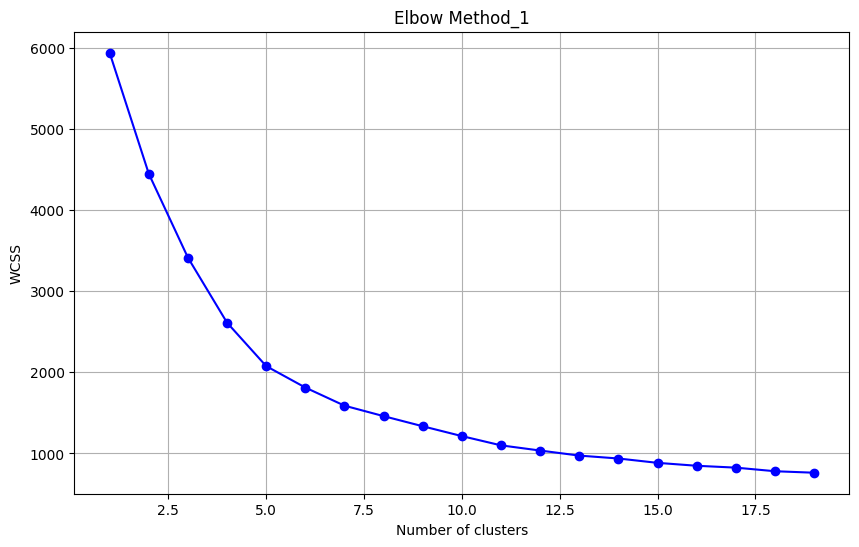

In [171]:
# 3. Plot the Elbow Curv_model_1
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method_1')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

## Buliding the k_neans Model_2

In [172]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans_2 = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans_2.fit(X_scaled_2)
    wcss.append(kmeans_2.inertia_)  # inertia_ is the WCSS

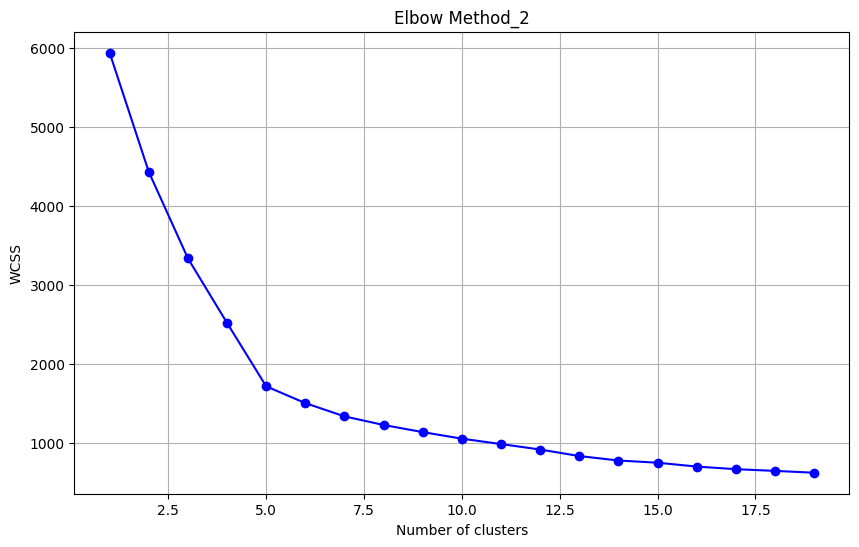

In [173]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method_2')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [174]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters_model_1 = 4 # This might change based on your actual elbow curve analysis
model_1 = KMeans(n_clusters=optimal_clusters_model_1, init='k-means++', max_iter=300, n_init=10, random_state=0)

optimal_clusters_model_2 = 5 # This might change based on your actual elbow curve analysis
model_2 = KMeans(n_clusters=optimal_clusters_model_2, init='k-means++', max_iter=300, n_init=10, random_state=0)

## Train and Test the Models

In [175]:
# Fit the model on the training data
y_pred_1 = model_1.fit_predict(X_scaled_1)

In [176]:
# Fit the model on the training data
y_pred_2 = model_2.fit_predict(X_scaled_2)

## Evaluating the Model

In [177]:
from sklearn.metrics import silhouette_samples, silhouette_score

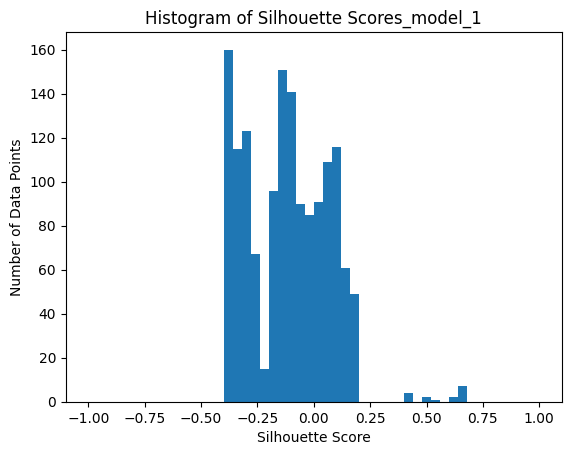

Silhouette average score: -0.11513382900693483


In [178]:
# Calculate Silhouette scores for each data point
#df_1 = df[['Number of donations','Location','project_month','Amount']]
silhouette_scores = silhouette_samples(X1, y_pred_1)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X1, y_pred_1)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores_model_1')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

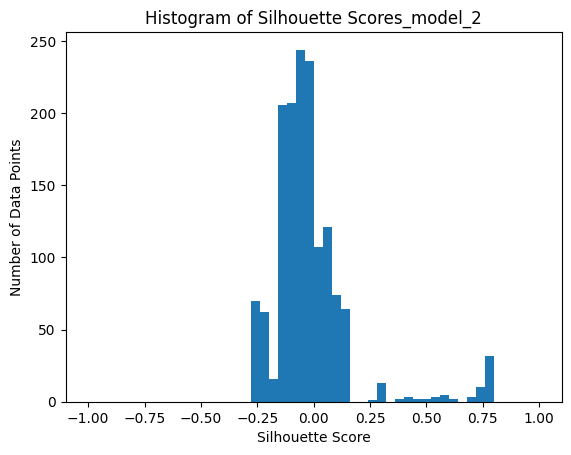

Silhouette average score: -0.019340832355316844


In [179]:
# Calculate Silhouette scores for each data point
#df_2 = df[['Number of donations','Beneficiaries','Location','project_month']]
silhouette_scores = silhouette_samples(X2, y_pred_2)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X2, y_pred_2)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores_model_2')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [180]:
X1['kmeans'] = y_pred_1

In [181]:
X1

,Amount,Location_encoded,Hijri_Month,Partner_encoded,kmeans
0,300000,1,9,256,0
1,280000,66,9,93,0
2,300000,134,9,140,3
3,300000,137,9,454,3
4,24000,0,9,0,0
...,...,...,...,...,...
1480,103680,283,7,433,3
1481,80000,40,7,432,1
1482,75000,172,7,741,3
1483,200000,149,7,170,3


In [182]:
X1['kmeans'].value_counts()

,count
kmeans,
0,950
1,302
3,216
2,17


In [183]:
X2['kmeans'] = y_pred_2

In [184]:
X2['kmeans'].value_counts()

,count
kmeans,
1,871
0,292
3,238
2,67
4,17


In [185]:
X2

,Number of donations,Beneficiaries,Location_encoded,Hijri_Month,kmeans
0,16226,20000,1,9,1
1,24403,20000,66,9,1
2,11930,30000,134,9,3
3,9378,11,137,9,3
4,145,1,0,9,1
...,...,...,...,...,...
1480,7685,432,283,7,3
1481,8673,1000,40,7,1
1482,4777,3,172,7,3
1483,18792,10,149,7,3


### model_1 visualization

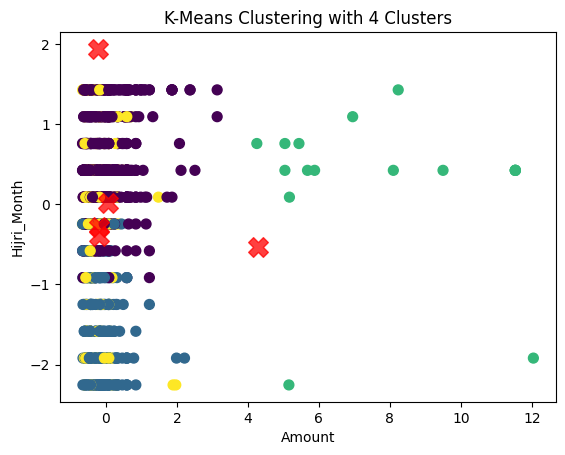

In [186]:
# Plotting the clusters with optimal number
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
plt.scatter(X_scaled_1[:, 0], X_scaled_1[:, 2], c=y_pred_1, s=50, cmap='viridis')

centers = model_2.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters_model_1} Clusters')
plt.xlabel('Amount')
plt.ylabel('Hijri_Month')
plt.show()


<Axes: xlabel='Amount', ylabel='Location_encoded'>

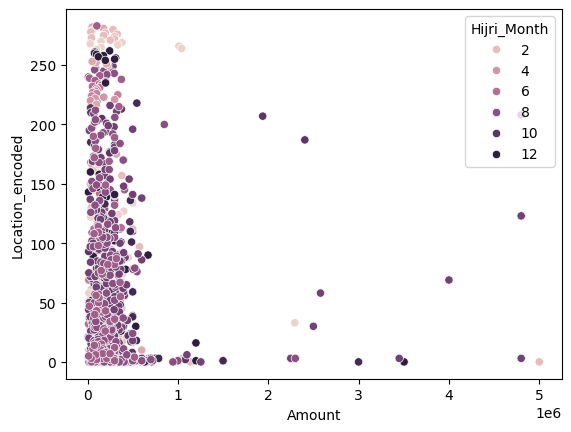

In [187]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
sns.scatterplot(data = X1 , x = 'Amount', y = 'Location_encoded', hue = 'Hijri_Month')

<Axes: xlabel='Location_encoded', ylabel='Hijri_Month'>

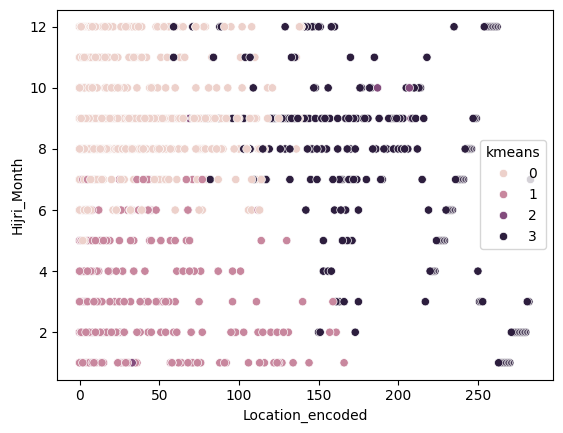

In [188]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner']]
sns.scatterplot(data = X1 , x = 'Location_encoded', y = 'Hijri_Month', hue = 'kmeans')




<Axes: xlabel='Location_encoded', ylabel='Partner_encoded'>

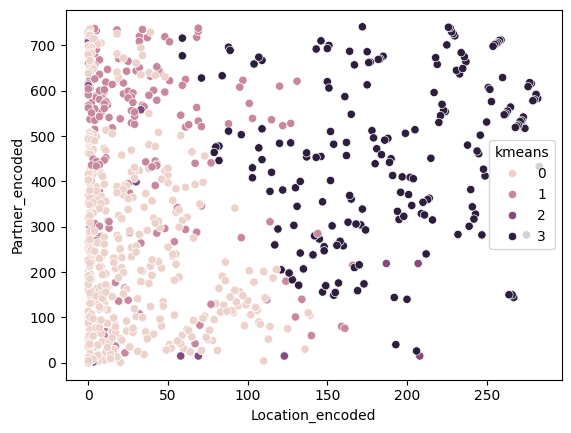

In [189]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
sns.scatterplot(data = X1 , x = 'Location_encoded', y = 'Partner_encoded', hue = 'kmeans')

In [190]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
import plotly
import plotly.express as px

fig = px.scatter_3d(X1, x='Amount', y='Location_encoded', z='Partner_encoded',
              color='Hijri_Month')
fig.show()

In [191]:
fig = px.scatter_3d(X1, x='Amount', y='Location_encoded', z='Hijri_Month',
              color='kmeans')
fig.show()

### model_2 visualization


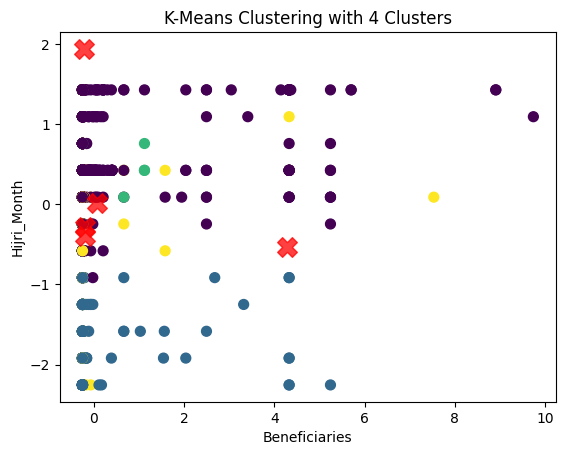

In [192]:
# Plotting the clusters with optimal number
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
plt.scatter(X_scaled_2[:, 1], X_scaled_2[:, 3], c=y_pred_1, s=50, cmap='viridis')

centers = model_2.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters_model_1} Clusters')
plt.xlabel('Beneficiaries')
plt.ylabel('Hijri_Month')
plt.show()


<Axes: xlabel='Number of donations', ylabel='Location_encoded'>

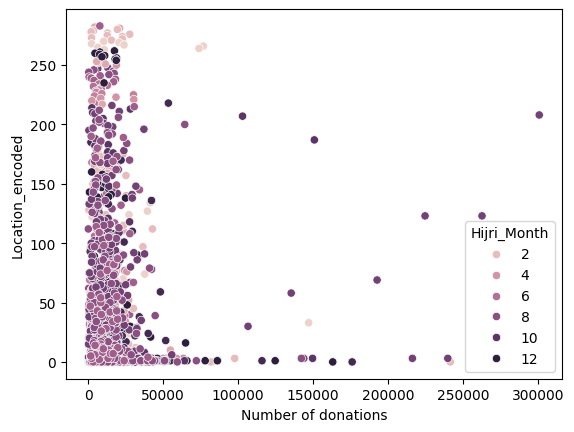

In [193]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X2 , x = 'Number of donations', y = 'Location_encoded', hue = 'Hijri_Month')

<Axes: xlabel='Location_encoded', ylabel='Hijri_Month'>

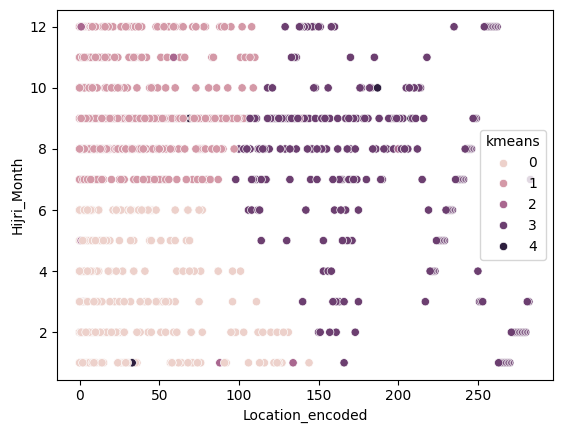

In [194]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X2 , x = 'Location_encoded', y = 'Hijri_Month', hue = 'kmeans')


#cluster 0 : are the projects that are in 6-10 month and the are in riyadh, makkah, madina

<Axes: xlabel='Number of donations', ylabel='Hijri_Month'>

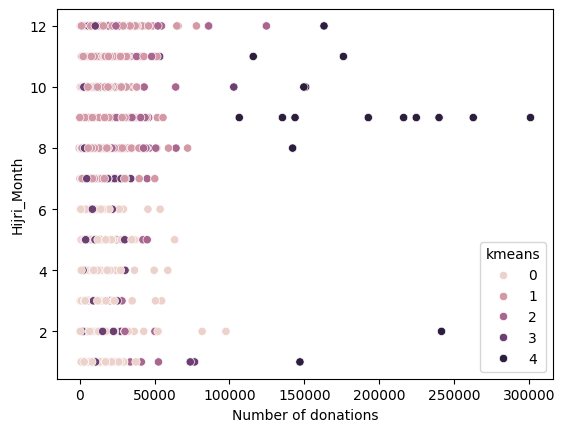

In [195]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X2 , x = 'Number of donations', y = 'Hijri_Month', hue = 'kmeans')

<Axes: xlabel='Beneficiaries', ylabel='Location_encoded'>

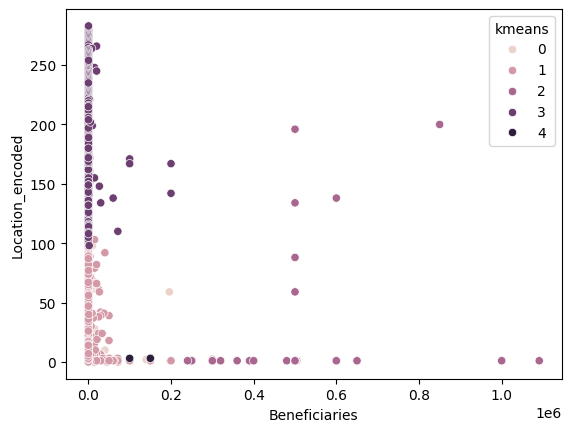

In [196]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X2 , x = 'Beneficiaries', y = 'Location_encoded', hue = 'kmeans')

In [197]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]

import plotly
import plotly.express as px

fig = px.scatter_3d(X2, x='Number of donations', y='Location_encoded', z='Hijri_Month',
              color='Hijri_Month')
fig.show()

In [198]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]

fig = px.scatter_3d(X2, x='Beneficiaries', y='Location_encoded', z='Hijri_Month',
              color='kmeans')
fig.show()

##DBSCAN models

In [199]:
from sklearn.cluster import DBSCAN
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
X3 = df_1
X_scaled_3 = scaler.fit_transform(X3)




# 2. Create and fit the DBSCAN model
model_3 = DBSCAN(eps=0.6, min_samples=11)   # Adjust eps and min_samples as needed
y_pred_3 = model_3.fit_predict(X_scaled_1)
df_1['dbscan_cluster'] = y_pred_3

In [200]:
cluster_num = len(set(y_pred_3))
print(f'number of cluster are_3: {cluster_num}')

number of cluster are_3: 6


In [201]:
# 2. Create and fit the DBSCAN model
X4 = df_2
X_scaled_4 = scaler.fit_transform(X4)

#model_4 = DBSCAN(eps=0.9, min_samples=3)
model_4 = DBSCAN(eps=0.9, min_samples=6)  # Adjust eps and min_samples as needed
y_pred_4 = model_4.fit_predict(X_scaled_2)
df_1['dbscan_cluster'] = y_pred_4

In [202]:
cluster_num = len(set(y_pred_4))
print(f'number of cluster are for model_4: {cluster_num}')

number of cluster are for model_4: 5


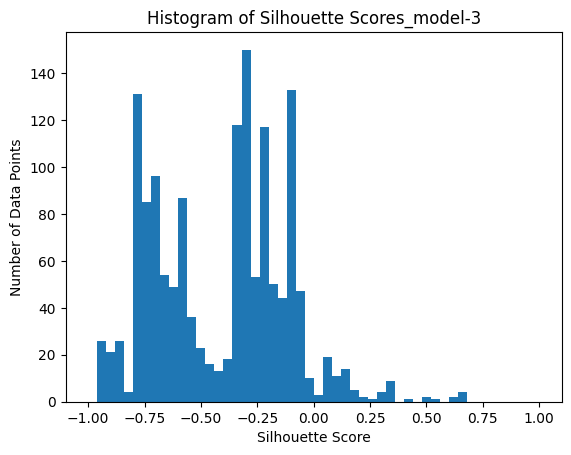

Silhouette average score: -0.41059654203903484


In [203]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X3, y_pred_3)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X3, y_pred_3)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores_model-3')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

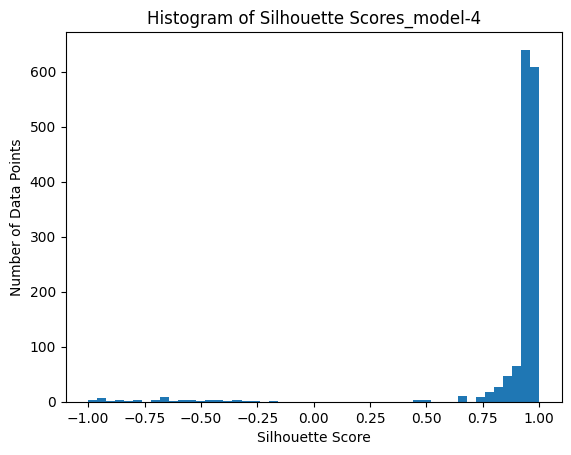

Silhouette average score: 0.8808697303704708


In [204]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]

# Calculate Silhouette scores for each data point
silhouette_scores = silhouette_samples(X4, y_pred_4)

# Calculate Silhouette average score
silhouette_avg = silhouette_score(X4, y_pred_4)

# Plot Silhouette scores
plt.hist(silhouette_scores, bins=50, range=(-1, 1))
plt.title('Histogram of Silhouette Scores_model-4')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Data Points')
plt.show()

print(f'Silhouette average score: {silhouette_avg}')

In [205]:
X3['y_pred_3'] = y_pred_3
X3['y_pred_3'].value_counts()

,count
y_pred_3,
0,1211
-1,139
2,64
4,36
3,23
1,12


In [206]:
X4['y_pred_4'] = y_pred_4
X4['y_pred_4'].value_counts()

,count
y_pred_4,
0,1382
-1,56
2,26
1,15
3,6


### model_3 visualization

<Axes: xlabel='Amount', ylabel='Location_encoded'>

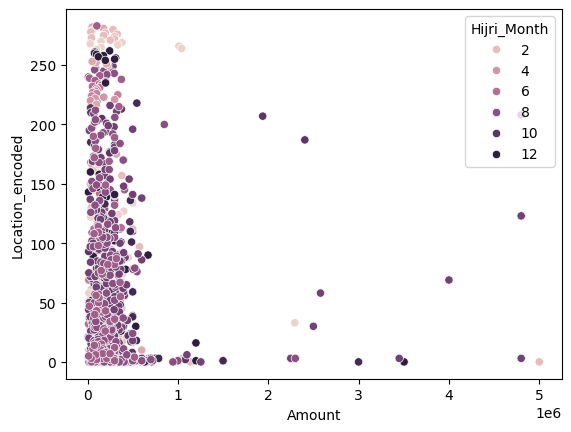

In [207]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
sns.scatterplot(data = X3 , x = 'Amount', y = 'Location_encoded', hue = 'Hijri_Month')

<Axes: xlabel='Location_encoded', ylabel='Hijri_Month'>

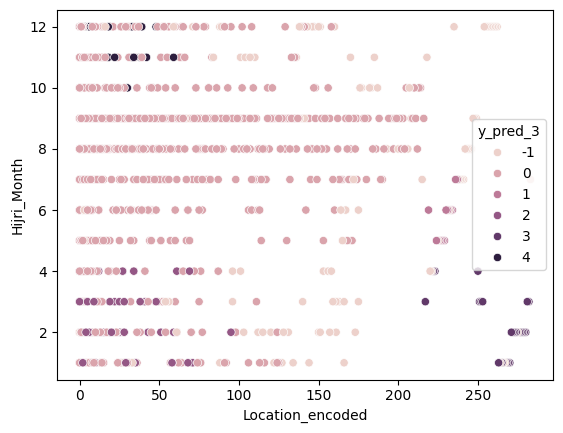

In [208]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner']]
sns.scatterplot(data = X3, x = 'Location_encoded', y = 'Hijri_Month', hue = 'y_pred_3')



<Axes: xlabel='Location_encoded', ylabel='Partner_encoded'>

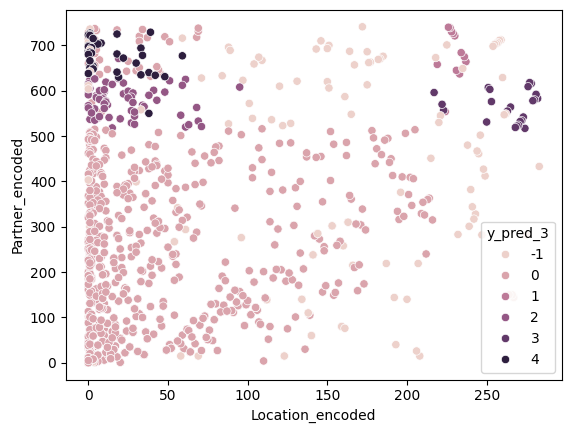

In [209]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
sns.scatterplot(data = X3 , x = 'Location_encoded', y = 'Partner_encoded', hue = 'y_pred_3')
# most partner praticipate in Riyadh projects.

In [210]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
fig = px.scatter_3d(X3, x='Amount', y='Location_encoded', z='Hijri_Month',
              color='y_pred_3')
fig.show()

In [211]:
#df_1 = df[['Amount','Location_encoded','Hijri_Month','Partner_encoded']]
fig = px.scatter_3d(X3, x='Amount', y='Location_encoded', z='Partner_encoded',
              color='y_pred_3')
fig.show()



##Best model
### model_4 visualization


<Axes: xlabel='Number of donations', ylabel='Location_encoded'>

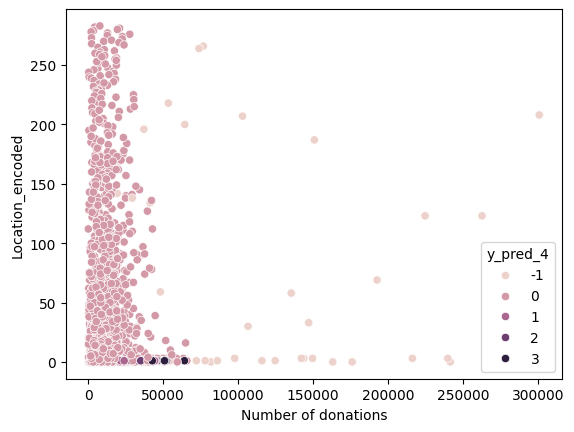

In [212]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X4 , x = 'Number of donations', y = 'Location_encoded', hue = 'y_pred_4')

<Axes: xlabel='Location_encoded', ylabel='Hijri_Month'>

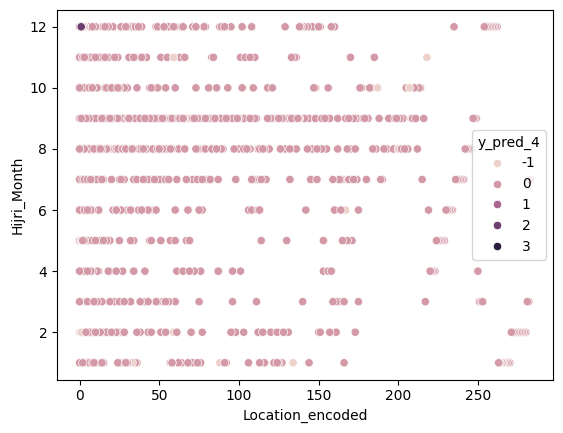

In [213]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X4 , x = 'Location_encoded', y = 'Hijri_Month', hue = 'y_pred_4')



<Axes: xlabel='Number of donations', ylabel='Hijri_Month'>

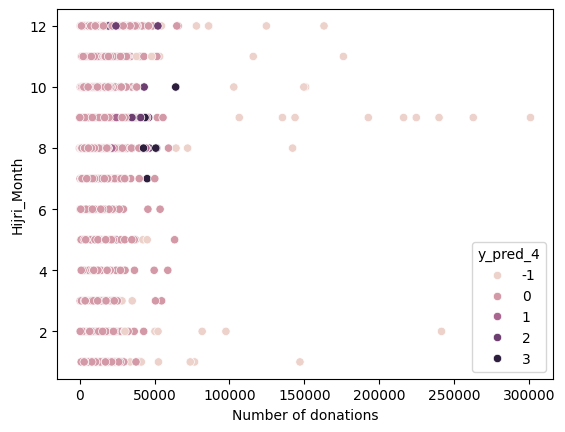

In [214]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X4, x = 'Number of donations', y = 'Hijri_Month', hue = 'y_pred_4')

<Axes: xlabel='Beneficiaries', ylabel='Location_encoded'>

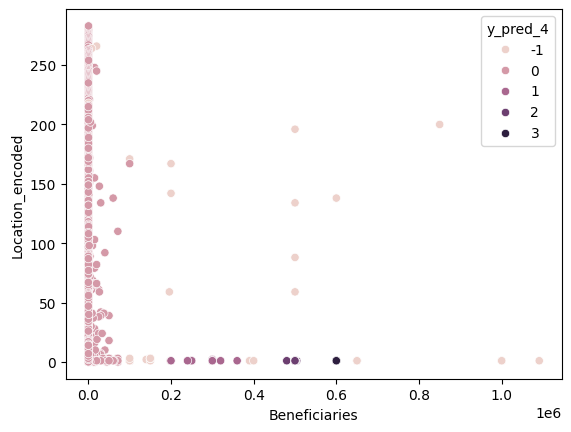

In [215]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]
sns.scatterplot(data = X4 , x = 'Beneficiaries', y = 'Location_encoded', hue = 'y_pred_4')

In [216]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]

import plotly
import plotly.express as px

fig = px.scatter_3d(X4, x='Number of donations', y='Location_encoded', z='Hijri_Month',
              color='y_pred_4')
fig.show()

In [217]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]

fig = px.scatter_3d(X4, x='Beneficiaries', y='Location_encoded', z='Hijri_Month',
              color='y_pred_4')
fig.show()



In [218]:
#df_2 = df[['Number of donations','Beneficiaries','Location_encoded','Hijri_Month']]

fig = px.scatter_3d(X4, x='Number of donations', y='Beneficiaries', z='Hijri_Month',
              color='y_pred_4')
fig.show()


المجموعة الاولى _0 ( البنفسج ) :  تمثل مشاريع احسان من بداية 2024 وحتى الان موزعة على كل  المناطق حيث ان عدد  المستفيدين فيها اقل من ١٠٠ الف وعدد المتبرعين لا يتجاوز 64 الف

المجموعة الثانية_1 ( الوردي ) : تمثل مشاريع احسان في مكة المكرمة والمدينة خلال 5 حتى 12 حيث  ان عدد المتبرعين لا يتجاوز 64 الف و عدد المستفيدين ما بين 240 الف و 320 الف .

المجموعة الثالثة _2 ( البرتقالي )  : تمثل مشاريع احسان في مكة المكرمة خلال شهر 8 حتى 12 حيث ان عدد المتبرعين لا يتجاوز 53 الف و عدد المستفيدين 500-600 الف

المجموعة الرابعة_3 ( الاصفر ) : تمثل مشاريع احسان في مكة المكرمة خلال شهر 7 وحتى 10 حيث ان عدد المتبرعين فيها لا يتجاوز 25 الف وعدد المستفيدين  600 الف